# Temperatursensor-Projekt

## 1. Einführung

### Projektziel
Das Ziel dieses Projekts ist es, die Temperatur mithilfe eines BME680-Sensors und eines Raspberry Pi zu messen und die Daten in Jupyter Notebook darzustellen. Dieses Projekt umfasst die Hardware-Schaltung, die Konfiguration des Raspberry Pi, die Programmierung in Python und die Visualisierung der Temperaturdaten. Es soll ein grundlegendes Verständnis für die Verwendung von Temperatursensoren, GPIO-Pins und die Datenverarbeitung in Python vermitteln.

### Hintergrund
Der BME680 ist ein Sensor, der Temperatur, Luftfeuchtigkeit, Luftdruck und Luftqualität misst. Er ist besonders nützlich für Umweltüberwachungsprojekte. Der Raspberry Pi ist ein kostengünstiger Einplatinencomputer, der häufig in Bildungs- und Hobbyprojekten verwendet wird. Durch die Kombination dieser beiden Komponenten können wir ein einfaches und effektives System zur Temperaturmessung und -überwachung erstellen.

### Relevanz
Mit der zunehmenden Bedeutung der Umweltüberwachung sind kostengünstige und effektive Lösungen zur Datenerfassung und -analyse erforderlich. Das hier vorgestellte Projekt kann in verschiedenen Bereichen wie Smart Home, Wetterstationen und wissenschaftlichen Untersuchungen eingesetzt werden.

## 2. Grunlagen und Theorie
Der BME680-Sensor verwendet die MEMS-Technologie (Micro-Electro-Mechanical Systems), um genaue Messungen von Temperatur, Luftfeuchtigkeit, Luftdruck und Luftqualität durchzuführen. Er kommuniziert über I2C oder SPI mit dem Raspberry Pi, wobei I2C in diesem Projekt verwendet wird.


## 3. Materialien und Werkzeuge

### Zusätzliche Software
- Raspbian OS
- Python 3
- Bibliotheken: smbus, adafruit und matplotlib.

### Zusätzliche Hardware
- Raspberry Pi 5
- BME680 Sensor
- Breadboard
- Jumper-Kabel
- Stromversorgung für den Raspberry Pi

### Sensoren/Aktoren, inkl. Datenblätter
- Versorgungsspannung: 1.7V bis 3.6V
- Stromverbrauch: 3.1 µA im Forced-Modus (Temperatur und Druckmessung)
- Messbereich: -40°C bis +85°C
- Genauigkeit: ±1.0°C
- Auflösung: 0.01°C

### Datenblatt-Links
- https://www.bosch-sensortec.com/media/boschsensortec/downloads/datasheets/bst-bme680-ds001.pdf

### Bus
Der BME680-Sensor von Bosch Sensortec unterstützt zwei Kommunikationsschnittstellen:
- I2C (bis zu 3.4 MHz)
- SPI (bis zu 10 MHz).

Für die meisten einfachen Projekte und speziell bei der Nutzung von mehreren Sensoren gleichzeitig wird häufig die I2C-Schnittstelle bevorzugt, da sie weniger GPIO-Pins benötigt und einfach zu konfigurieren ist.

### Pin Beschaltung
- VCC des BME680  an 3.3V des Raspberry Pi
- GND des BME680 an GND des Raspberry Pi
- SCL des BME680 an SCL des Raspberry Pi (GPIO 5)
- SDA des BME680 an SDA des Raspberry Pi (GPIO 3)

- https://botland.de/blog/projekte-mit-dem-raspberry-pi-anschluss-des-sensors-bme680-2/

### Berechnung des Vorwiderstands
Ein Vorwiderstand ist nicht erforderlich, da der Sensor direkt an den Raspberry Pi angeschlossen wird.

### Komponentenauswahl
- **BME680 Sensor:** Die Auswahl des BME680 basiert auf seiner Fähigkeit, mehrere Umweltparameter mit hoher Genauigkeit zu messen.

## 4. Schaltungsdesign

### Schaltplan  
<img src="Bilder/schaltplan.png" style="width:400px;">

- https://www.circuito.io/app?components=9443,164792,200000

## 5. Implementierung

### Hardware-Aufbau
- Verbinden Sie den BME680-Sensor gemäß der oben genannten Pin-Beschaltung mit dem Raspberry Pi.
- Stellen Sie sicher, dass der Raspberry Pi ordnungsgemäß mit Strom versorgt wird.

### Software-Setup
1. Raspbian OS installieren.
2. Python, Jupyter Notebook und Bibliotheken installieren:
    ```sh
    sudo apt-get update
    sudo apt-get install python3 jupyter
    !sudo apt-get install -y python3-pip python3-smbus i2c-tools
    !pip3 install adafruit-circuitpython-bme680
    ```

### Code

### Bibliotheken Installieren

##### Installation von smbus

```!sudo apt-get install -y python3-pip python3-smbus i2c-tools```

##### Installtion von adafruit:

```!pip3 install adafruit-circuitpython-bme680```

In [ ]:
### Bibliotheken importieren
import time
from board import *
import busio
import adafruit_bme680

# I2C initialisieren
print(SCL, SDA)
i2c = busio.I2C(SCL,SDA)

# BME680 Sensor initialisieren
bme680 = adafruit_bme680.Adafruit_BME680_I2C(i2c)

# Optional: Offset für die Umgebungstemperatur anpassen
bme680.sea_level_pressure = 1013.25

while True:
    print(f"Temperatur: {bme680.temperature:.2f} °C")
    time.sleep(2)

## 6. Experimente und Ergebnisse

### Ergebnisse

#### Darstullung in Matplotlib

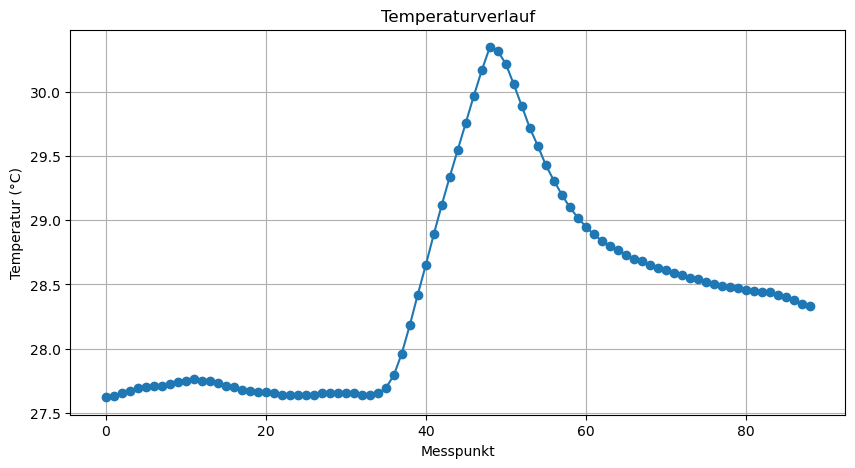

In [59]:
# Schritt 1: Importiere die benötigten Bibliotheken
import pandas as pd
import matplotlib.pyplot as plt

# Schritt 2: Erstelle eine Liste der Temperaturen
temperaturen = [
    27.62, 27.63, 27.65, 27.67, 27.69, 27.70, 27.71, 27.71, 27.72, 27.74, 
    27.75, 27.76, 27.75, 27.75, 27.73, 27.71, 27.70, 27.68, 27.67, 27.66, 
    27.66, 27.65, 27.64, 27.64, 27.64, 27.64, 27.64, 27.65, 27.65, 27.65, 
    27.65, 27.65, 27.64, 27.64, 27.65, 27.69, 27.79, 27.96, 28.18, 28.42, 
    28.65, 28.89, 29.12, 29.34, 29.55, 29.76, 29.97, 30.17, 30.35, 30.32, 
    30.22, 30.06, 29.89, 29.72, 29.58, 29.43, 29.31, 29.20, 29.10, 29.02, 
    28.95, 28.89, 28.84, 28.80, 28.77, 28.73, 28.70, 28.68, 28.65, 28.63, 
    28.61, 28.59, 28.57, 28.55, 28.54, 28.52, 28.50, 28.49, 28.48, 28.47, 
    28.46, 28.45, 28.44, 28.44, 28.42, 28.40, 28.38, 28.35, 28.33
]

# Schritt 3: Erstelle ein Pandas DataFrame aus der Liste
df = pd.DataFrame(temperaturen, columns=['Temperatur'])

# Schritt 4: Visualisiere die Daten mit Matplotlib
plt.figure(figsize=(10, 5))
plt.plot(df['Temperatur'], marker='o')
plt.title('Temperaturverlauf')
plt.xlabel('Messpunkt')
plt.ylabel('Temperatur (°C)')
plt.grid(True)
plt.show()


### Nutzliche Links zu Matplotlib
- https://matplotlib.org/stable/tutorials/pyplot.html
- https://hub.binder.curvenote.dev/user/matplotlib-mpl-brochure-binder-3yu8bhu6/doc/tree/MatplotlibExample.ipynb

### Mittelwert und Ungenauigkeit der bme680 Daten

In [ ]:
import statistics

# Liste der Temperaturen
temperaturen = [
    27.62, 27.63, 27.65, 27.67, 27.69, 27.70, 27.71, 27.71, 27.72, 27.74, 
    27.75, 27.76, 27.75, 27.75, 27.73, 27.71, 27.70, 27.68, 27.67, 27.66, 
    27.66, 27.65, 27.64, 27.64, 27.64, 27.64, 27.64, 27.65, 27.65, 27.65, 
    27.65, 27.65, 27.64, 27.64, 27.65, 27.69, 27.79, 27.96, 28.18, 28.42, 
    28.65, 28.89, 29.12, 29.34, 29.55, 29.76, 29.97, 30.17, 30.35, 30.32, 
    30.22, 30.06, 29.89, 29.72, 29.58, 29.43, 29.31, 29.20, 29.10, 29.02, 
    28.95, 28.89, 28.84, 28.80, 28.77, 28.73, 28.70, 28.68, 28.65, 28.63, 
    28.61, 28.59, 28.57, 28.55, 28.54, 28.52, 28.50, 28.49, 28.48, 28.47, 
    28.46, 28.45, 28.44, 28.44, 28.42, 28.40, 28.38, 28.35, 28.33
]

# Mittelwert berechnen
mittelwert = statistics.mean(temperaturen)

# Standardabweichung berechnen
standardabweichung = statistics.stdev(temperaturen)

print(f"Der Mittelwert der Temperaturen ist: {mittelwert:.2f} °C")
print(f"Die Standardabweichung der Temperaturen ist: {standardabweichung:.2f} °C")

Der Mittelwert der Temperaturen ist: 28.42 °C
Die Standardabweichung der Temperaturen ist: 0.78 °C


### Expriment:
Vergleich zwischen den gemessenen Daten der BME680 und BME280 Sensoren

### Intallation der Bibliotheken

```
sudo apt-get update
sudo apt-get install python3-pip
pip3 install smbus2
pip3 install RPi.bme280
pip3 install adafruit-circuitpython-bme280

```

### Code zum Testen

In [ ]:
### Biblliotheken importieren
import smbus2
import bme280
import time

In [ ]:
# Initialisierung des I2C Busses und BME280 Sensors
bus = smbus2.SMBus(1)
address = 0x76
calibration_params = bme280.load_calibration_params(bus, address)

In [ ]:
# Code zum Ablesen der Temperatur
try:
    while True:
        # Sample the BME280 sensor
        data = bme280.sample(bus, address, calibration_params)
        
        # Print the temperature
        print(f"Temperature: {data.temperature:.2f} °C")
        
        # Wait for 1 second before the next reading
        time.sleep(1)

except KeyboardInterrupt:
    # Exit the loop when the user presses Ctrl+C
    print("Temperature monitoring stopped.")


### Darstellung in  Matplotlib

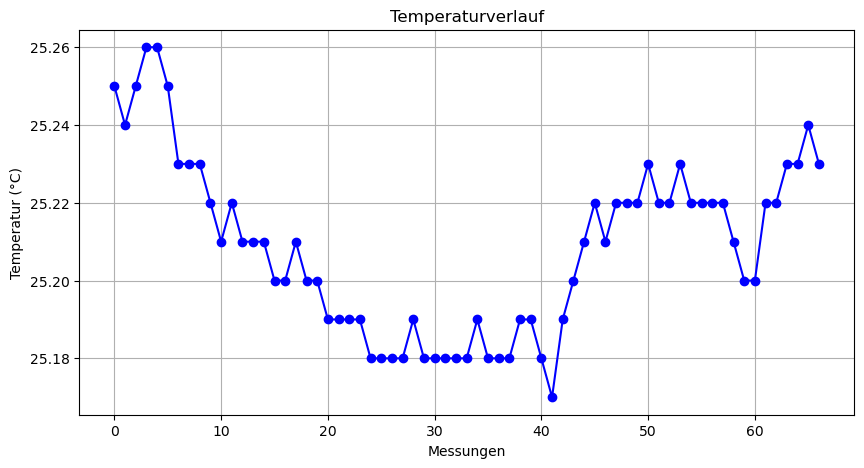

In [24]:
import matplotlib.pyplot as plt

# Daten
temperaturen = [
    25.25, 25.24, 25.25, 25.26, 25.26, 25.25, 25.23, 25.23, 25.23, 25.22,
    25.21, 25.22, 25.21, 25.21, 25.21, 25.20, 25.20, 25.21, 25.20, 25.20,
    25.19, 25.19, 25.19, 25.19, 25.18, 25.18, 25.18, 25.18, 25.19, 25.18,
    25.18, 25.18, 25.18, 25.18, 25.19, 25.18, 25.18, 25.18, 25.19, 25.19,
    25.18, 25.17, 25.19, 25.20, 25.21, 25.22, 25.21, 25.22, 25.22, 25.22,
    25.23, 25.22, 25.22, 25.23, 25.22, 25.22, 25.22, 25.22, 25.21, 25.20,
    25.20, 25.22, 25.22, 25.23, 25.23, 25.24, 25.23
]

# Erstelle eine x-Achse basierend auf der Anzahl der Temperaturen
x_werte = list(range(len(temperaturen)))

# Diagramm erstellen
plt.figure(figsize=(10, 5))
plt.plot(x_werte, temperaturen, marker='o', linestyle='-', color='b')
plt.title('Temperaturverlauf')
plt.xlabel('Messungen')
plt.ylabel('Temperatur (°C)')
plt.grid(True)
plt.show()


### Mittelwert und Ungenauigkeit der bme280 Daten 

In [30]:
import statistics

# Temperaturen
temperaturen = [
    25.25, 25.24, 25.25, 25.26, 25.26, 25.25, 25.23, 25.23, 25.23, 25.22,
    25.21, 25.22, 25.21, 25.21, 25.21, 25.20, 25.20, 25.21, 25.20, 25.20,
    25.19, 25.19, 25.19, 25.19, 25.18, 25.18, 25.18, 25.18, 25.19, 25.18,
    25.18, 25.18, 25.18, 25.18, 25.19, 25.18, 25.18, 25.18, 25.19, 25.19,
    25.18, 25.17, 25.19, 25.20, 25.21, 25.22, 25.21, 25.22, 25.22, 25.22,
    25.23, 25.22, 25.22, 25.23, 25.22, 25.22, 25.22, 25.22, 25.21, 25.20,
    25.20, 25.22, 25.22, 25.23, 25.23, 25.24, 25.23
]

# Mittelwert berechnen
mittelwert = statistics.mean(temperaturen)

# Standardabweichung berechnen
standardabweichung = statistics.stdev(temperaturen)

print(f"Der Mittelwert der Temperaturen ist: {mittelwert:.2f} °C")
print(f"Die Standardabweichung der Temperaturen ist: {standardabweichung:.2f} °C")


Der Mittelwert der Temperaturen ist: 25.21 °C
Die Standardabweichung der Temperaturen ist: 0.02 °C


### Vergleich
Dieser Vergleich gibt Ihnen eine Vorstellung davon, wie sich die beiden Sensoren in Bezug auf Messgenauigkeit und Präzision verhalten. Der BME280 scheint zuverlässiger zu sein, da er eine konsistentere Messung mit geringerer Streuung bietet, während der BME680 größere Schwankungen aufweist und einen höheren Mittelwert liefert.

## 7. Diskussion und Fazit

### Diskussion
Die Temperaturmessung mit dem BME680-Sensor und dem Raspberry Pi ist relativ einfach und liefert genaue Ergebnisse. Der Einsatz von Jupyter Notebook ermöglicht eine interaktive und benutzerfreundliche Darstellung der Daten. Eine mögliche Herausforderung könnte die Kalibrierung und Validierung der Messdaten sein, insbesondere in Umgebungen mit extremen Temperaturen.

### Fazit
Dieses Projekt zeigt, wie man einen Temperatursensor mit einem Raspberry Pi verwendet. Es bietet eine gute Grundlage, um die GPIO-Pins des Raspberry Pi und die Datenverarbeitung in Python kennenzulernen. Die Ergebnisse sind vielversprechend und das Projekt kann leicht erweitert werden, um komplexere Systeme zur Umweltdatenmessung zu entwickeln.